# ResUNeta inference demo for FoVx1 dataset 

In [1]:
%pylab inline

import mxnet as mx 
from mxnet import gluon, autograd
import mxnet.ndarray as nd
import seaborn as sns
sns.set_style({'legend.frameon':True})
sns.set(font_scale=1.5, rc={'text.usetex' : True})
sns.set_style("white")


# root directory of resuneta repository 
# ##### REPLACE THIS WITH YOUR ROOT DIRECTORY ################
import sys
sys.path.insert(0, '/home/dia021/Projects/isprs_potsdam/src/')

# isprs dataset 
from ISPRSDataset import *
from ISPRSNormal import *


from resuneta.models.resunet_d7_causal_mtskcolor_ddist import *
from resuneta.nn.loss.loss import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Change this to gpu if you want, cpu works fine as well
ctx = mx.cpu()

### Model specific characteristics

In [3]:
nfilters_init = 32
NClasses = 6
Nbatch = 4

mynet = ResUNet_d7(nfilters_init,NClasses)

# Saved weights for the d7 model 
flname_prefix = r'/home/YourUserName/SomePrefix/'
flname_weights = flname_prefix + r'RESUNETA-D7-MODEL.params'

mynet.hybridize()
mynet.load_parameters(flname_weights,ctx=ctx)

depth:= 0, nfilters: 32
depth:= 1, nfilters: 64
depth:= 2, nfilters: 128
depth:= 3, nfilters: 256
depth:= 4, nfilters: 512
depth:= 5, nfilters: 1024
depth:= 6, nfilters: 2048
depth:= 7, nfilters: 1024
depth:= 8, nfilters: 512
depth:= 9, nfilters: 256
depth:= 10, nfilters: 128
depth:= 11, nfilters: 64
depth:= 12, nfilters: 32


In [7]:
# Definitions for visualizations

from matplotlib.colors import hsv_to_rgb

def view_slice_n_all_preds( _img,_GT,_preds,_threshold=0.5,_figsize=(12,15),fig_name=None):
    
    
    _img = _img.asnumpy()
    
    img2 = tnorm.restore(_img)
    
    _GT_label = _GT[:NClasses,:,:].asnumpy()
    _GT_label = np.argmax(_GT_label,axis=0)
    
    _GT_bound = _GT[NClasses:2*NClasses,:,:].asnumpy()
    _GT_bound = np.sum(_GT_bound,axis=0)
    
    _GT_dist = _GT[2*NClasses:3*NClasses,:,:].asnumpy()
    _GT_dist = np.sum(_GT_dist,axis=0)
    
    _GT_color = _GT[3*NClasses:,:,:].asnumpy()
    
    
    _preds_label = _preds[0].asnumpy()
    _preds_label = np.argmax(_preds_label,axis=0)

    _preds_bound = _preds[1].asnumpy()
    _preds_bound = np.sum(_preds_bound,axis=0)
    _preds_bound /= _preds_bound.max()

    _preds_dist = nd.sum(nd.clip(_preds[2],a_min=0.3,a_max=1.0),axis=0).asnumpy()
    _preds_dist = (_preds_dist - _preds_dist.min())/(_preds_dist.max() - _preds_dist.min())
    
    

    _preds_color = _preds[3].asnumpy()
    _preds_color = _preds_color.transpose([1,2,0])
    
    
    fig = plt.figure(figsize=_figsize)
    
    G=gridspec.GridSpec(4,3) # xy, yz, xz, (Rxy,Vz), (Ryz,Vx), (Rzx,Vy)
    G.update(left=0.05,right=0.80 ,top=0.95,bottom=0.15 ,hspace=0.025,wspace=0.05)
    

    ax11 = plt.subplot(G[0,0])
    ax12 = plt.subplot(G[0,1])
    ax13 = plt.subplot(G[0,2])
    
    ax21 = plt.subplot(G[1,0])
    ax22 = plt.subplot(G[1,1])
    ax23 = plt.subplot(G[1,2])
    
    
    ax31 = plt.subplot(G[2,0])
    ax32 = plt.subplot(G[2,1])
    ax33 = plt.subplot(G[2,2])

    ax41 = plt.subplot(G[3,0])
    ax42 = plt.subplot(G[3,1])
    ax43 = plt.subplot(G[3,2])


    
    # View standard img
    fontsize=16
    ax11.imshow(img2.transpose([1,2,0])[:,:,[0,1,2]])
    ax11.set_yticklabels([])
    ax11.set_xticklabels([])

    ax21.imshow(img2.transpose([1,2,0])[:,:,[0,1,2]])
    ax21.set_yticklabels([])
    ax21.set_xticklabels([])

    ax31.imshow(img2.transpose([1,2,0])[:,:,[0,1,2]])
    ax31.set_yticklabels([])
    ax31.set_xticklabels([])


    ax41.imshow(img2.transpose([1,2,0])[:,:,[0,1,2]])
    ax41.set_yticklabels([])
    ax41.set_xticklabels([])

    
    
    # View class GT and prediction 
    cmap = ListedColormap(np.array([Class1H2RGB[k] for k in sorted(Class1H2RGB.keys())])/255.0)
    bounds = np.linspace(0,6,7)
    norm = BoundaryNorm(bounds,cmap.N)

    
    ax12.set_xticklabels([])
    ax13.set_xticklabels([])
    ax22.set_xticklabels([])
    ax23.set_xticklabels([])
    ax32.set_xticklabels([])
    ax33.set_xticklabels([])
    ax42.set_xticklabels([])
    ax43.set_xticklabels([])

    
    ax12.set_yticklabels([])
    ax13.set_yticklabels([])
    ax22.set_yticklabels([])
    ax23.set_yticklabels([])
    ax32.set_yticklabels([])
    ax33.set_yticklabels([])
    ax42.set_yticklabels([])
    ax43.set_yticklabels([])

    
    im = ax12.imshow(_GT_label,cmap=cmap,interpolation=None,norm=norm,rasterized=True)
    values = Class1H2RGB.values() # Use this if you want the full list 

    patches = [ mpatches.Patch(color=np.array(Class1H2RGB[k])/255., label = classNames[Class1H2RGB[k]]['name'] ) for k in sorted(Class1H2RGB.keys())]

    
    edgc='black'
    loc=(1.7,1.0)
    location='upper right'
    ax13.legend(handles=patches,edgecolor=edgc,framealpha=1.0,bbox_to_anchor=loc, loc=location,frameon=True,markerscale=1.25,markerfirst=False,fancybox=True, borderaxespad=0.,fontsize=fontsize)
    ax13.imshow(_preds_label,cmap=cmap,norm=norm,interpolation=None,rasterized=True)

    
    ax22.imshow(_GT_bound,cmap=cm.Greys_r)
    cbar_ax = fig.add_axes([.83, .565, .02, .18])
    im1 = ax23.imshow(_preds_bound, cmap=cm.Greys_r,rasterized=True)
    colorbar(im1, ax=ax23,cax=cbar_ax)    
    
    ax32.imshow(_GT_dist,cmap=cm.Greys_r)
    cbar_ax2 = fig.add_axes([.83, .36, .02, .18])
    im = ax33.imshow(_preds_dist,cmap=cm.Greys_r)
    colorbar(im, ax=ax33,cax=cbar_ax2)    
    
    
    ax42.imshow(hsv_to_rgb(_preds_color),rasterized=True)
    diff = np.mean(_preds_color - _GT_color.transpose([1,2,0]),axis=-1)
    diff =  2*(diff-diff.min())/(diff.max()-diff.min()) - np.ones_like(diff) 
    
    cbar_ax3 = fig.add_axes([.83, .15, .02, .19])
    im2 = ax43.imshow(diff,cmap=cm.Greys_r,rasterized=True)
    colorbar(im2, ax=ax43,cax=cbar_ax3)    
    
    if fig_name is not None:
        plt.savefig(r'../images/{}'.format(fig_name))

        
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

classNames = {
    (255,0,0):{'name':'Background','cType':0},
    (255,255,255):{'name':'ImSurf','cType':1},
    (255,255,0):{'name':'Car','cType':2},
    (0,0,255):{'name':'Building','cType':3},
    (0,255,255):{'name':'LowVeg','cType':4},
    (0,255,0):{'name':'Tree','cType':5}}


classNamesFast = {
    (255,0,0):0,
    (255,255,255):1,
    (255,255,0):2,
    (0,0,255):3,
    (0,255,255):4,
    (0,255,0):5}


Class1H2RGB =  dict([[str(val),key] for key,val in classNamesFast.items()])


import seaborn
seaborn.set_style({'legend.frameon':True})
seaborn.set(font_scale=1.5, rc={'text.usetex' : True})
seaborn.set_style("white")

from matplotlib import gridspec 
def view_slice_n_preds( _img,_GT,_preds,_threshold=0.5,_figsize=(15,5),fig_name=None):
    
    
    
    
    _img = _img.asnumpy()
    
    img2 = tnorm.restore(_img)
    
    _GT = _GT[:NClasses,:,:].asnumpy()
    _GT = np.argmax(_GT,axis=0)
    _preds = _preds.asnumpy()
    _preds = np.argmax(_preds,axis=0)
    

    plt.figure(figsize=_figsize)
    
    G=gridspec.GridSpec(1,4) # xy, yz, xz, (Rxy,Vz), (Ryz,Vx), (Rzx,Vy)
    G.update(left=0.05,right=0.82 ,top=0.95,bottom=0.15 ,hspace=0.0,wspace=0.05)

    
    aximg   = plt.subplot(G[0,0])
    axGT    = plt.subplot(G[0,2]) #fig.add_subplot(143)
    
    axDEMS  = plt.subplot(G[0,1]) #fig.add_subplot(142)
    axPREDS = plt.subplot(G[0,3]) #fig.add_subplot(144)

    
    # View standard img
    fontsize=16
    aximg.imshow(img2.transpose([1,2,0])[:,:,[3,1,2]])
    aximg.set_yticklabels([])
    aximg.set_xticklabels([])


    
    
    cmap = ListedColormap(np.array([Class1H2RGB[k] for k in sorted(Class1H2RGB.keys())])/255.0)
    bounds = np.linspace(0,6,7)
    norm = BoundaryNorm(bounds,cmap.N)

    
    aximg.set_xticklabels([])
    axGT.set_xticklabels([])
    axDEMS.set_xticklabels([])
    axPREDS.set_xticklabels([])

    aximg.set_yticklabels([])
    axGT.set_yticklabels([])
    axDEMS.set_yticklabels([])
    axPREDS.set_yticklabels([])

    preds=_preds

    im = axGT.imshow(_GT,cmap=cmap,rasterized=True)
    im = axGT.imshow(_GT,cmap=cmap,interpolation=None,norm=norm,rasterized=True)

    values = Class1H2RGB.values() # Use this if you want the full list 

    patches = [ mpatches.Patch(color=np.array(Class1H2RGB[k])/255., label = classNames[Class1H2RGB[k]]['name'] ) for k in sorted(Class1H2RGB.keys())]

    
    edgc='black'
    loc=(1.7,1.0)
    location='upper right'
    axPREDS.legend(handles=patches,edgecolor=edgc,framealpha=1.0,bbox_to_anchor=loc, loc=location,frameon=True,markerscale=1.25,markerfirst=False,fancybox=True, borderaxespad=0.,fontsize=fontsize)


    axDEMS.imshow(_img.transpose([1,2,0])[:,:,4],cmap='Greys_r',rasterized=True)
    axPREDS.imshow(_preds,cmap=cmap,norm=norm,interpolation=None,rasterized=True)
        
    plt.tight_layout()
    
    if fig_name is not None:
        plt.savefig(r'../images/{}'.format(fig_name))



### Set up normalization, dataset

In [5]:
# I need to make this a function, since I'll be applying it in many many different problems. 
tnorm = ISPRSNormal()
ttrans = None

# @@@@@@@@@@@ MODIFY HERE WITH THE ROOT LOCATION WHERE YOU HAVE THE DATA @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
dataset = ISPRSDataset(root=r'/scratch1/dia021/isprs_potsdam/Data_6k/',mode='val',color=True,mtsk=True,norm=tnorm)
datagen = gluon.data.DataLoader(dataset,batch_size=Nbatch,shuffle=True)

/scratch1/dia021/Software/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/scratch1/dia021/Software/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/scratch1/dia021/Software/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/scratch1/dia021/Software/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so resul

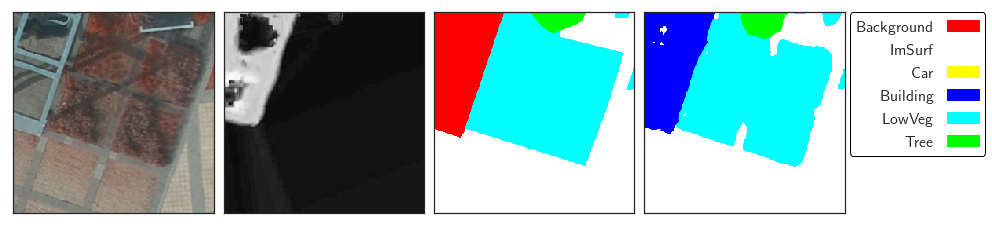

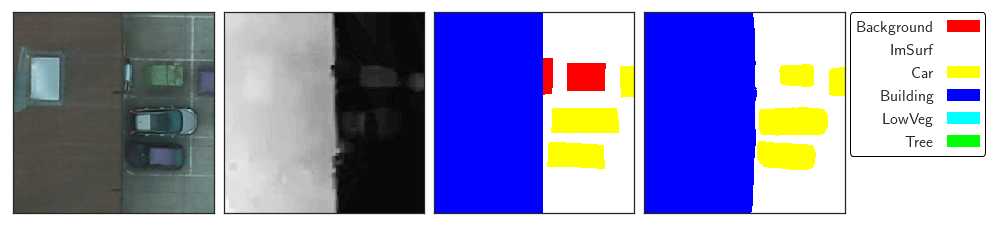

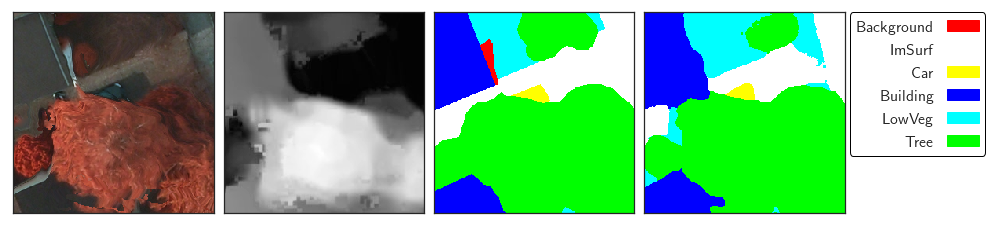

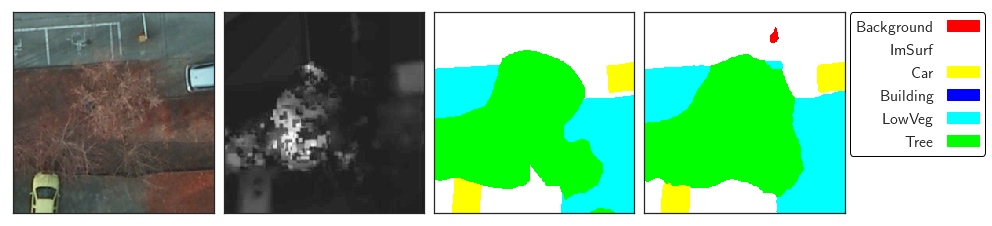

In [8]:
for (imgs,labels) in datagen:
    with autograd.predict_mode():
        preds1, preds2, preds3, preds4 = mynet(imgs)
    break
    
for idx in range(Nbatch):
    view_slice_n_preds(imgs[idx],labels[idx],preds1[idx],_figsize=(15,8))

### View inference over all tasks:

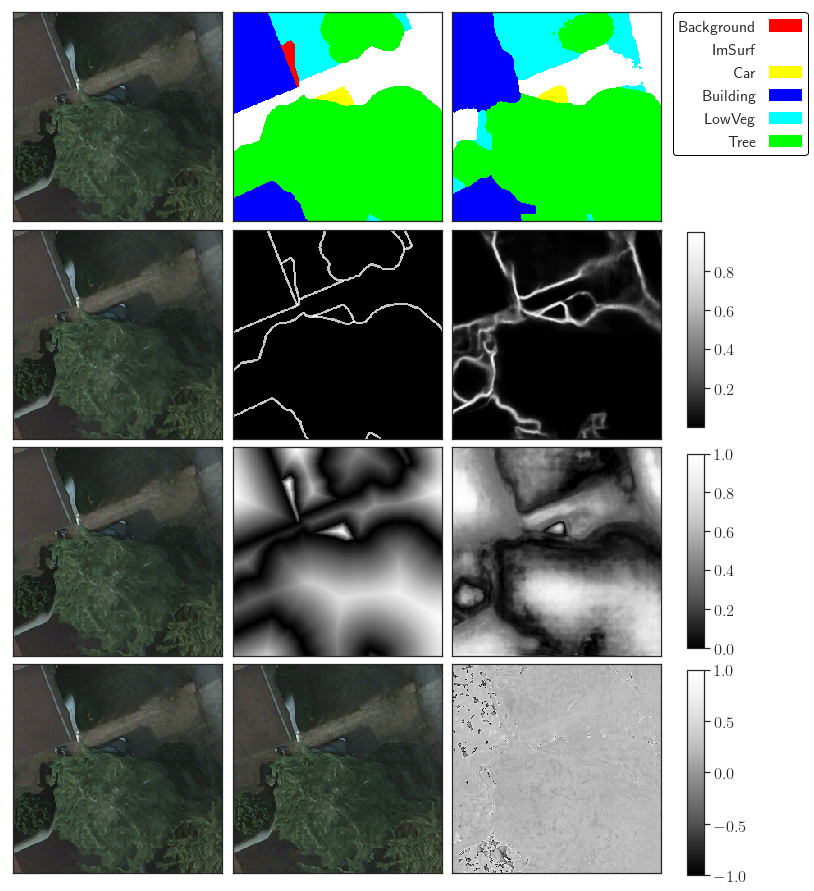

In [9]:
idx_img=2
view_slice_n_all_preds(imgs[idx_img],labels[idx_img],[preds1[idx_img],preds2[idx_img],preds3[idx_img],preds4[idx_img]])

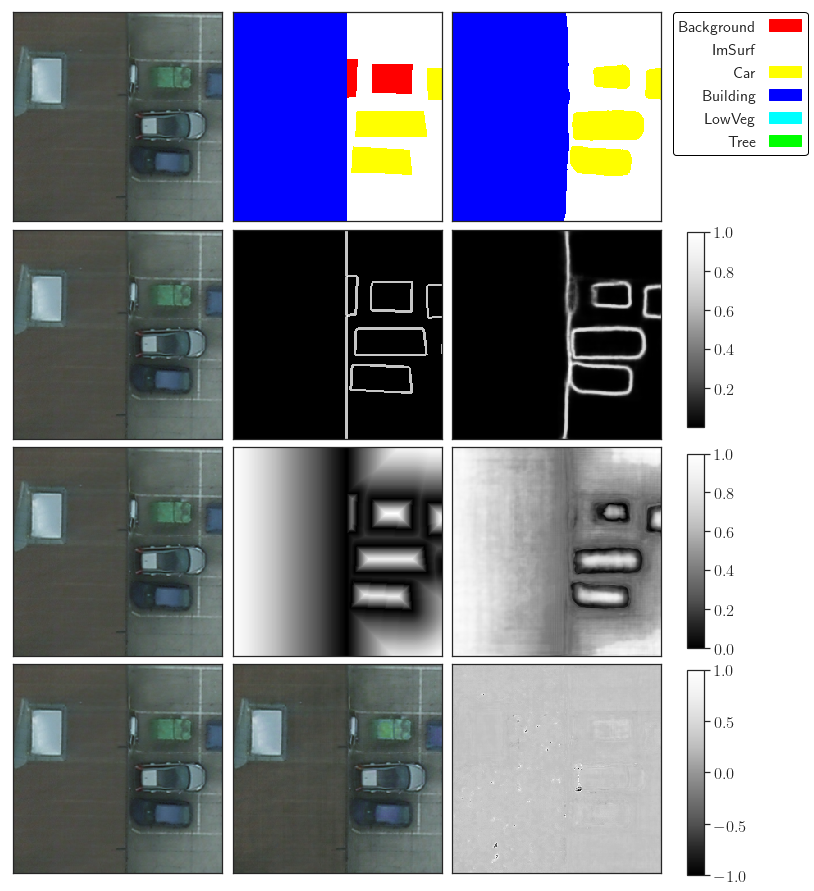

In [10]:
idx_img=1
view_slice_n_all_preds(imgs[idx_img],labels[idx_img],[preds1[idx_img],preds2[idx_img],preds3[idx_img],preds4[idx_img]])

### View per class GT and confidence

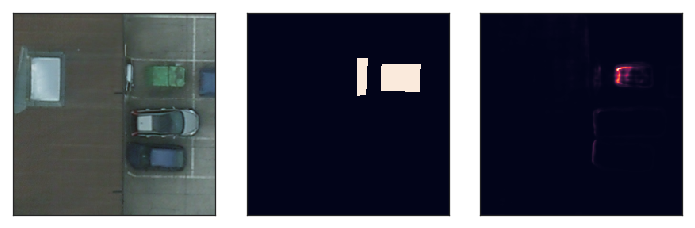

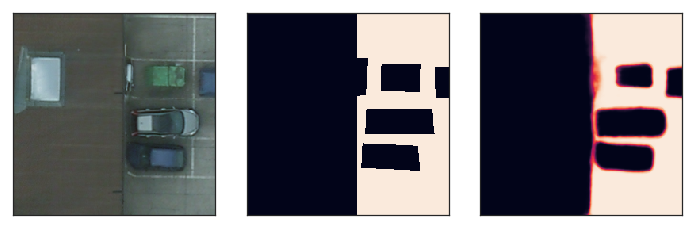

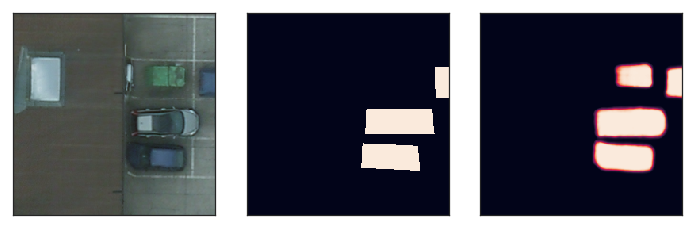

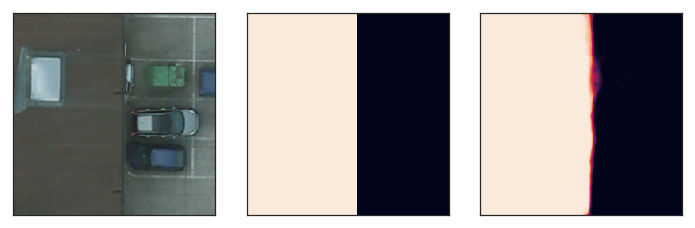

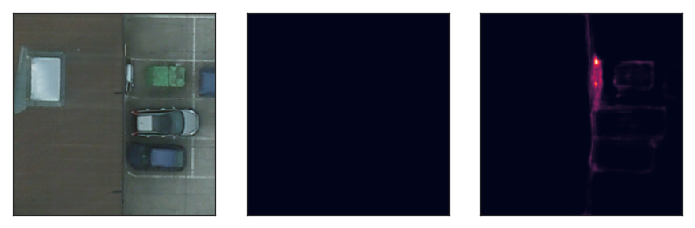

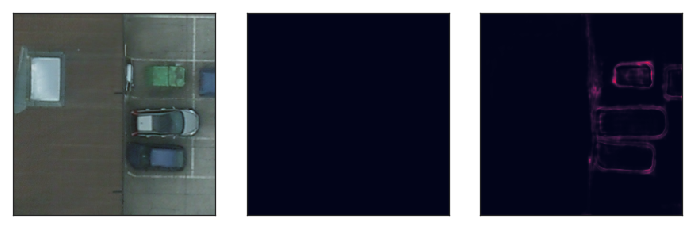

In [12]:
tlabel = labels[idx_img][:6,:,:].asnumpy()
timg = imgs[idx_img].asnumpy()
tpreds = preds1[idx_img].asnumpy()


for idx in range(6):
    fig = figure(figsize=(10,6))
    ax1 = fig.add_subplot(131)
    ax2 = fig.add_subplot(132)
    ax3 = fig.add_subplot(133)
    
    ax1.imshow(tnorm.restore(timg).transpose([1,2,0])[:,:,:3])
    ax2.imshow(tlabel[idx])
    ax3.imshow(tpreds[idx])
    
    ax1.set_xticklabels('')
    ax1.set_yticklabels('')
    ax2.set_xticklabels('')
    ax2.set_yticklabels('')
    ax3.set_xticklabels('')
    ax3.set_yticklabels('')
    
    tight_layout()
    

### Per class all tasks inference 

From left to right: input image, GT segm, infered segm, GT boundary, infered boundary, GT distance, infered distance map

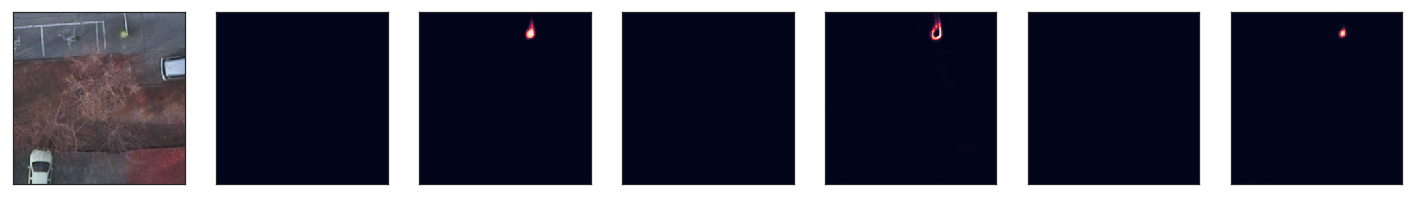

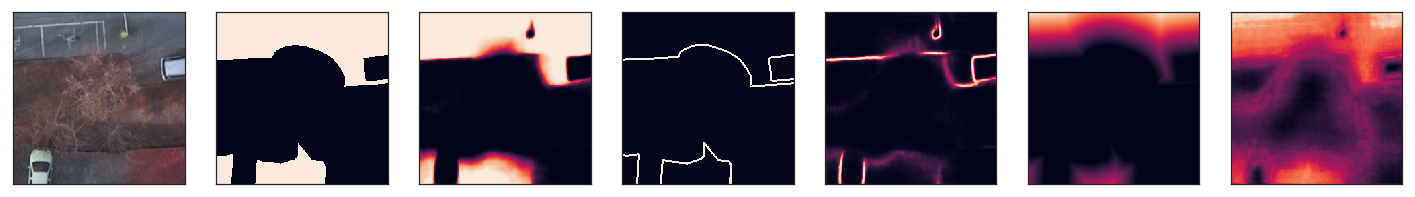

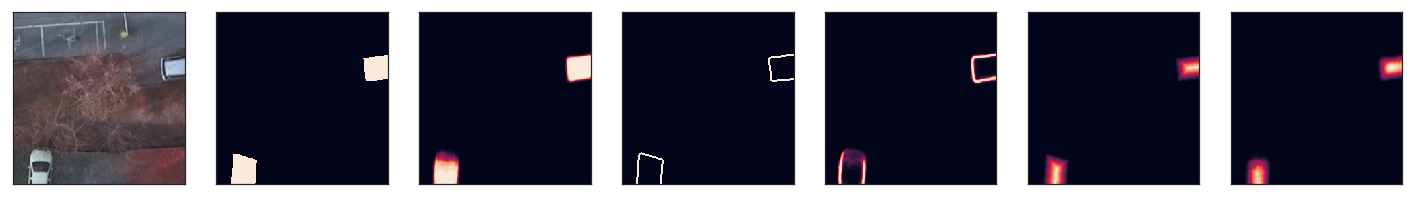

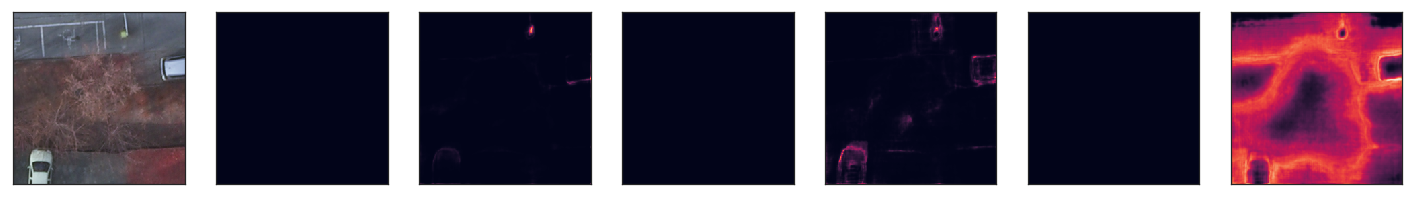

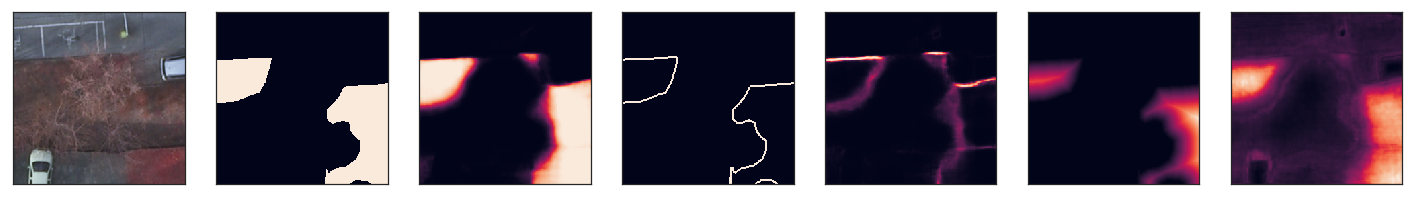

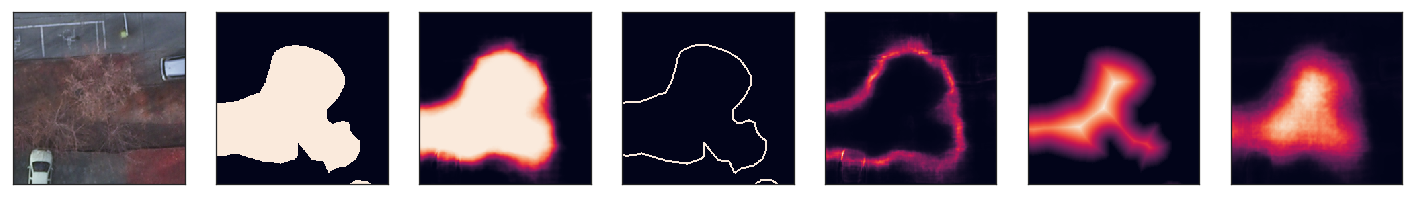

In [22]:
idx_img = 3
temp = tnorm.restore(imgs.asnumpy()[idx_img])

for idx in range(6):
    fig = figure(figsize=(20,5))

    ax1 = fig.add_subplot(171)
    ax2 = fig.add_subplot(172)
    ax3 = fig.add_subplot(173)
    ax4 = fig.add_subplot(174)
    ax5 = fig.add_subplot(175)
    ax6 = fig.add_subplot(176)
    ax7 = fig.add_subplot(177)
    
    
    ax1.imshow(temp.transpose([1,2,0])[:,:,[3,0,1]])
    ax2.imshow(labels[idx_img,idx,:,:].asnumpy())
    ax3.imshow(preds1[idx_img,idx,:,:].asnumpy())
    
    ax4.imshow(labels[idx_img,idx+6,:,:].asnumpy())
    ax5.imshow(preds2[idx_img,idx,:,:].asnumpy())
    
    ax6.imshow(labels[idx_img,idx+12,:,:].asnumpy())
    ax7.imshow(preds3[idx_img,idx,:,:].asnumpy())

    
    ax1.set_xticks([])
    ax2.set_xticks([])
    ax3.set_xticks([])
    ax4.set_xticks([])
    ax5.set_xticks([])
    ax6.set_xticks([])
    ax7.set_xticks([])
    
    ax1.set_yticks([])
    ax2.set_yticks([])
    ax3.set_yticks([])
    ax4.set_yticks([])
    ax5.set_yticks([])
    ax6.set_yticks([])
    ax7.set_yticks([])
    
    tight_layout()

    #